# t-SNE
[Wikipedia's Notes on t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

## `sklearn` summary of t-SNE


In [23]:
from sklearn.manifold import TSNE
help(TSNE)

Help on class TSNE in module sklearn.manifold.t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5)
 |  
 |  t-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of dimensions to a rea

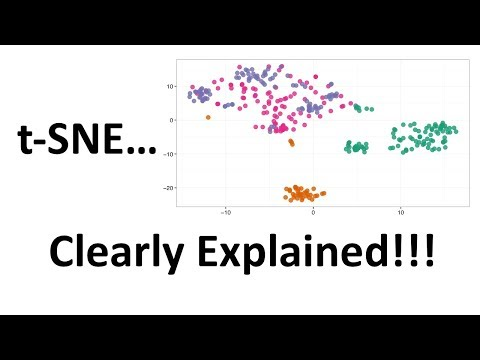

In [3]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('NEaUSP4YerM',width=800, height=400)

***
***
## Python Implementation from Lab using [`sklearn.manifold.TSNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
**<font size="5" color="red">CHECK: We will use t-SNE to visualize the 4-dimensional iris dataset, as 2 dimensions?</font>**

### Imports

In [15]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

### Read data [`iris dataset`](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
[`sklearn.datasets.load_iris`](sklearn.datasets.load_iris)  
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray  

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [1]:
from sklearn.datasets import load_iris
help(load_iris)

Help on function load_iris in module sklearn.datasets.base:

load_iris(return_X_y=False)
    Load and return the iris dataset (classification).
    
    The iris dataset is a classic and very easy multi-class classification
    dataset.
    
    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============
    
    Read more in the :ref:`User Guide <datasets>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object. See
        below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the classifica

In [16]:
filename = 'Iris.csv'
df = pd.read_csv(filename)
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### Converting text to numerical with [`sklearn.preprocessing.LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
Mapping Species to numbers

In [17]:
species_encoder = LabelEncoder()

# species_encoder.fit(df['Species'])
# df['Species'] = species_encoder.transform(df['Species'])

# OR IN ONE LINE:
df['Species'] = species_encoder.fit_transform(df['Species'])
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


### Data cleaning

In [18]:
df = df.sample(frac=1) # shuffle rows of dataset
target = df['Species']

# inputs = df.loc[:,'SepalLengthCm':'PetalWidthCm'] # attributes
# OR using drop
inputs = df.drop(['Id','Species'],axis=1)

X = inputs.values
y = target.values

# print(X, y)

### **<font size="5" color="red">What is the purpose of this???</font>**

In [19]:
k_fold = KFold(n_splits=5)
k_fold.get_n_splits(X)    # this is simply an accessor, useless


accs = []
for train_idx, test_idx in k_fold.split(X):
    train_X, test_X = X[train_idx], X[test_idx]
    train_y, test_y = y[train_idx], y[test_idx]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predictions = clf.predict(test_X)
    acc = metrics.f1_score(test_y, predictions, average='micro') # mean average percentage error
    accs.append(acc)
print(np.mean(accs))
print(np.std(accs))
print(accs)

0.9533333333333334
0.02666666666666666
[0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0]


### Executing t-SNE

In [20]:
tsne = TSNE(n_components=2)
projections = tsne.fit_transform(X)

### Visualizing the results

/home/chris24/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/chris24/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/chris24/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<Figure size 1080x720 with 0 Axes>

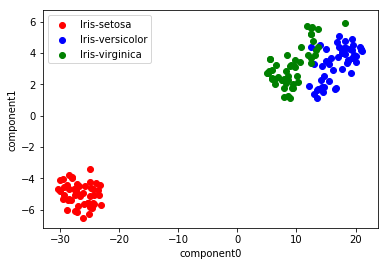

In [21]:
def color_mapping(cl):
    colors = ['red', 'blue', 'green']
    return colors[cl]
color_mapper = np.vectorize(color_mapping)
colors = color_mapper(y)


def plot_classification(ax, x, y, colors, legend):
    color_set = set(colors)
    for color in color_set:
        x_curr = []
        y_curr = []
        for i, c in enumerate(colors):
            if c == color:
                x_curr.append(x[i])
                y_curr.append(y[i])
        ax.scatter(x_curr, y_curr, c=color,label=legend[color])


plt.figure(figsize=(15, 10))
fig, ax = plt.subplots()
legend = {'red': species_encoder.inverse_transform(0), # transforming numbers back to words
          'blue': species_encoder.inverse_transform(1),
         'green': species_encoder.inverse_transform(2)}
plot_classification(ax, projections[:,0], projections[:,1], colors, legend)
ax.set_xlabel('component0')
ax.set_ylabel('component1')
ax.legend()

plt.show()